In [10]:
import os 
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [11]:
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

df = pd.read_pickle('../../../data/processed/state2/android_df.pkl')
print(df.shape)

(591, 13)


In [12]:
df.columns

Index(['eventType', 'eventSampleSpeed', 'eventDurationSeconds',
       'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed',
       'memsMedianLateralAccel', 'memsP75LateralAccel', 'memsP95LateralAccel',
       'gyro_angular_change_per_second', 'gyroAngleChange', 'mems_radius',
       'aggressive'],
      dtype='object')

In [13]:
df = df[(df['eventType'] == 4)]

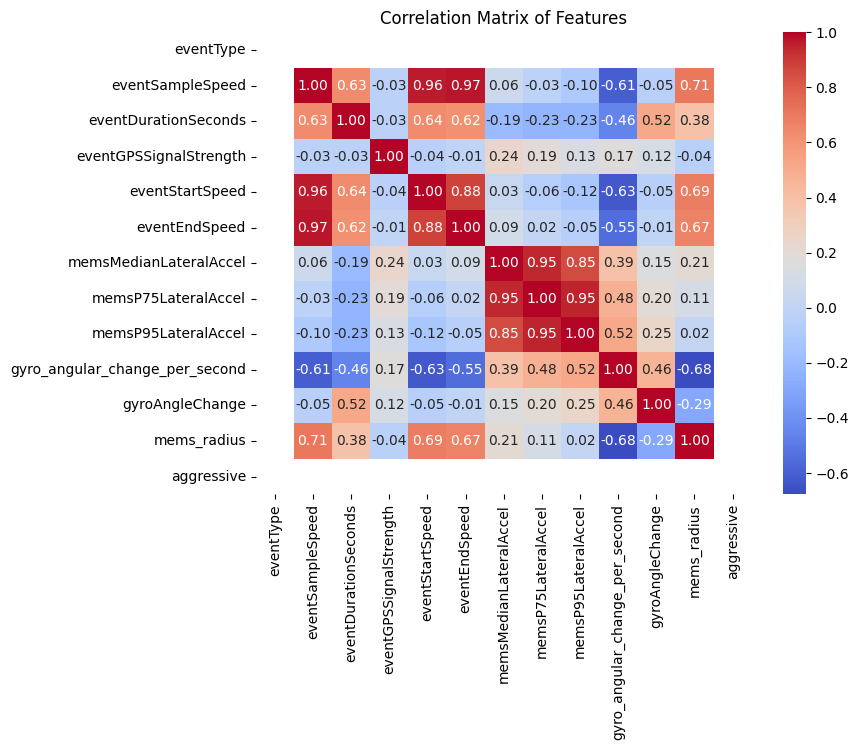

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [15]:
df = df.drop(columns=['eventType', 'eventSampleSpeed', 'eventGPSSignalStrength', 'memsP75LateralAccel', 'memsP95LateralAccel', 'aggressive'])
df = df.dropna(subset=['gyroAngleChange'])
corr_matrix = df.corr()

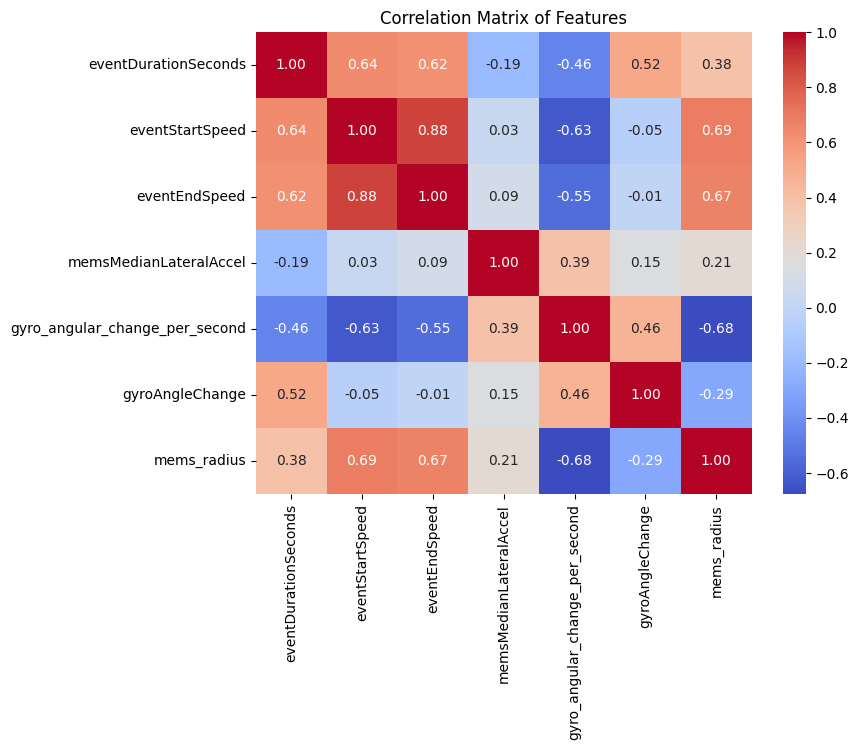

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [17]:
df.columns

Index(['eventDurationSeconds', 'eventStartSpeed', 'eventEndSpeed',
       'memsMedianLateralAccel', 'gyro_angular_change_per_second',
       'gyroAngleChange', 'mems_radius'],
      dtype='object')

In [18]:
# Save new_df to file to later load
df.to_pickle(root / "data" / "processed" / "state2" / 'left_android_df.pkl')